<a href="https://colab.research.google.com/github/taledv/Titanic/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 6 different classification algorithms :)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, plot_confusion_matrix 


import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
dfTrain = pd.read_csv('drive/MyDrive/Colab Notebooks/titanic/train.csv')
dfTest = pd.read_csv('drive/MyDrive/Colab Notebooks/titanic/test.csv')

print(dfTrain.shape)
print(dfTest.shape)
dfTrain.head()

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking which attributes contain nans (Train - Age,Cabin,Embarked, Test-Age,Fare, Cabin)

In [ ]:
print(dfTrain.isnull().sum())
print(dfTest.isnull().sum())

Train - Embarked only has 2 entries with nans so we just remove instead of impute


In [21]:
dfTrain.dropna(subset=['Embarked'], inplace=True)
dfTrain.shape
print(dfTrain.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Test - Fare only has 1 entry with nan so we just remove instead of impute


In [22]:
dfTest.dropna(subset=['Fare'], inplace=True)
dfTest.shape
print(dfTest.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64


Now only Age and Cabin have NaNs - need to fix it

First lets see how Age varies

['S' 'C' 'Q' nan]


Embarked
C    168
Q     77
S    644
dtype: int64

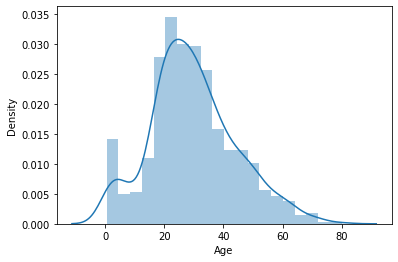

In [11]:
sns.distplot(dfTrain["Age"])

Imputing Age both in Train and Test

In [ ]:
dfTrain['Age'].fillna(dfTrain['Age'].mean(), inplace=True)
dfTest['Age'].fillna(dfTest['Age'].mean(), inplace=True)

Droping columns

In [ ]:
dfTrain.drop(labels=['Ticket', 'Cabin','PassengerId', 'Name' ], axis=1, inplace=True)
dfTest.drop(labels=['Ticket', 'Cabin','PassengerId', 'Name'], axis=1, inplace=True)

Making sure there are no NaNs now

In [ ]:
print(dfTrain.isnull().sum())
print(dfTest.isnull().sum())

Dealing with categorical data (sex,embarked)

In [ ]:
dfTrain['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

dfTrain_OneHot = pd.get_dummies(dfTrain, columns=['Embarked'])

dfTest['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

dfTest_OneHot = pd.get_dummies(dfTest, columns=['Embarked'])

Checking the all categorical data are converted

In [ ]:
dfTrain_OneHot.head()

In [ ]:
ytrain = dfTrain_OneHot['Survived'].values
Xtrain = dfTrain_OneHot.drop(labels=['Survived'], axis=1).copy()
Xtest = dfTest_OneHot.copy()

Checking new Dataframs are fine and ready for fitting

In [ ]:
Xtrain.head()

Creating validation set by splitting training

In [ ]:
Xtraining, Xvalid, ytraining, yvalid = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=0) 
print(Xtrain.shape)
print(Xtraining.shape)
print(Xvalid.shape)

Logistic regression

0.8044692737430168


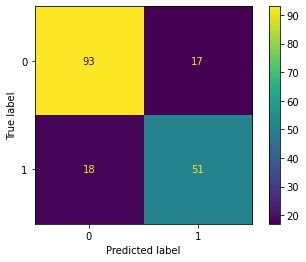

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(Xtraining, ytraining)
pred_lr = lr_clf.predict(Xvalid)
acc_lr = accuracy_score(yvalid, pred_lr)
plot_confusion_matrix(lr_clf, Xvalid, yvalid)  
print(acc_lr)

Suppor vector machine model

0.7206703910614525


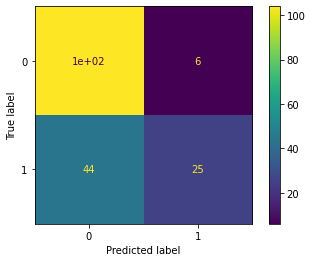

In [ ]:
svc_clf = SVC() 
svc_clf.fit(Xtraining, ytraining)
pred_svc = svc_clf.predict(Xvalid)
acc_svc = accuracy_score(yvalid, pred_svc)
plot_confusion_matrix(svc_clf, Xvalid, yvalid)  
print(acc_svc)

Decision Tree

0.7653631284916201


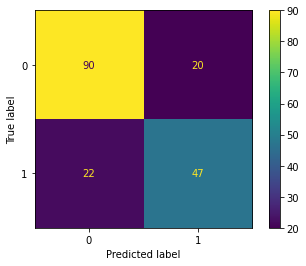

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(Xtraining, ytraining)
pred_dt = dt_clf.predict(Xvalid)
acc_dt = accuracy_score(yvalid, pred_dt)
plot_confusion_matrix(dt_clf, Xvalid, yvalid)  
print(acc_dt)

Random Foresets

0.8268156424581006


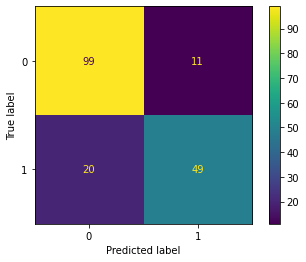

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(Xtraining, ytraining)
pred_rf = rf_clf.predict(Xvalid)
acc_rf = accuracy_score(yvalid, pred_rf)
plot_confusion_matrix(rf_clf, Xvalid, yvalid)  
print(acc_rf)

Adaboost

0.8212290502793296


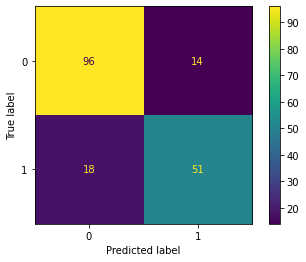

In [ ]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(Xtraining, ytraining)
pred_ada = ada_clf.predict(Xvalid)
acc_ada = accuracy_score(yvalid, pred_ada)
plot_confusion_matrix(ada_clf, Xvalid, yvalid)  
print(acc_ada)

XGBoost

0.8156424581005587


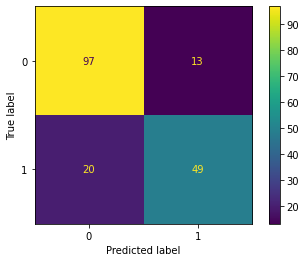

In [ ]:
xgb_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xgb_clf.fit(Xtraining, ytraining)
pred_xgb = xgb_clf.predict(Xvalid)
acc_xgb = accuracy_score(yvalid, pred_xgb)
plot_confusion_matrix(xgb_clf, Xvalid, yvalid)  
print(acc_xgb)

Combining all the models in one DF

In [ ]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision tree', 'Random forests', 'SVC', 'Adaboost', 'XGBoost'], 'Accuracy': [acc_lr, acc_dt, acc_rf, acc_svc, acc_ada, acc_xgb]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random forests,0.826816
4,Adaboost,0.821229
5,XGBoost,0.815642
0,Logistic Regression,0.804469
1,Decision tree,0.765363
3,SVC,0.720670


Using GridSearchCV to tune parameters in XGBoost

In [ ]:
xgb_clf = XGBClassifier()
params = {'eta':[0.001,0.01, 0.1, 0.3, 1], 'max_depth':[3,5,7,9]}
grid_xgb = GridSearchCV(xgb_clf, params, scoring = make_scorer(accuracy_score), verbose=2)
grid_xgb = grid_xgb.fit(Xtraining, ytraining)
grid_xgb.best_estimator_


Using GridSearchCV to tune parameters in RF

In [ ]:
rf_clf = RandomForestClassifier()
params = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]}
grid_rf = GridSearchCV(rf_clf, params, scoring = make_scorer(accuracy_score), verbose=1)
grid_rf = grid_rf.fit(Xtraining, ytraining)

Evaluating the best Random forest

0.8212290502793296


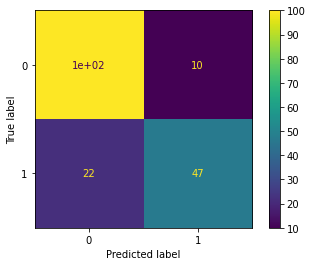

In [ ]:
best_rf = grid_rf.best_estimator_
pred_best_rf = best_rf.predict(Xvalid)
acc_best_rf = accuracy_score(yvalid, pred_best_rf)
plot_confusion_matrix(best_rf, Xvalid, yvalid)  
print(acc_best_rf)

Predicting ytest and submission

In [ ]:
test_pred = best_rf.predict(Xtest)

submission = pd.DataFrame({
        "PassengerId": dfTest["PassengerId"],
        "Survived": test_pred
    })
# submission.to_csv('../output/submission.csv', index=False)
